# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. Training the Agent

In [6]:
from collections import deque
from ddpg_agent import Agent
import torch

mean_score_objective = 0.5

In [7]:
def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    all_scores = []
    all_avg_scores = []

    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=True)[brain_name]
        scores = np.zeros(num_agents)
        states = env_info.vector_observations

        agent.reset()

        for t in range(max_t):
            # takes action
            actions  = agent.act(states)
            env_info = env.step(actions)[brain_name]

            # Get state from environment
            next_states = env_info.vector_observations
            rewards     = env_info.rewards
            dones       = env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states
            scores += rewards
            
            if np.any(dones):
                break

        score = np.max(scores)
        all_scores.append(score)
        scores_deque.append(score)
        avg_score = np.mean(scores_deque)
        all_avg_scores.append(avg_score)

        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tLast Score: {:.2f}\tAverage Score: {:.2f}' \
                  .format(i_episode, score, avg_score))

        if avg_score>=mean_score_objective:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}' \
                  .format(i_episode-100, avg_score))
            break

    return all_scores, all_avg_scores

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, fc1_units=400, fc2_units=300, batch_size=128, random_seed=667)
scores, avg_scores = ddpg()

Episode 100	Last Score: 0.00	Average Score: 0.00
Episode 200	Last Score: 0.09	Average Score: 0.01
Episode 300	Last Score: 0.00	Average Score: 0.04
Episode 400	Last Score: 0.00	Average Score: 0.01
Episode 500	Last Score: 0.09	Average Score: 0.03
Episode 600	Last Score: 0.00	Average Score: 0.05
Episode 700	Last Score: 0.20	Average Score: 0.04
Episode 800	Last Score: 0.10	Average Score: 0.10
Episode 900	Last Score: 0.50	Average Score: 0.16

Environment solved in 844 episodes!	Average Score: 0.51


### 5. Plotting the results

In [9]:
import matplotlib.pyplot as plt

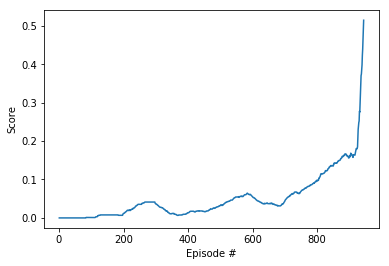

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

#plt.show()
plt.savefig('avg_score.png')

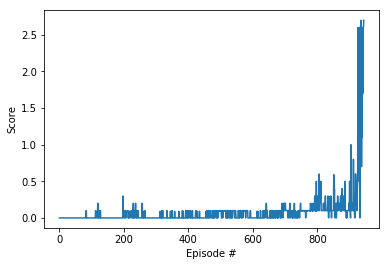

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

#plt.show()
plt.savefig('score.png')

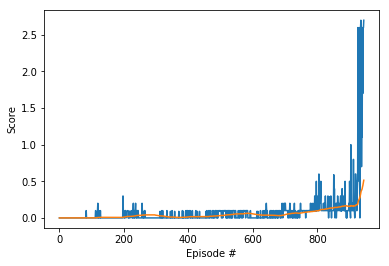

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

#plt.show()
plt.savefig('avg_score_and_score.png')

When finished, you can close the environment.

In [13]:
env.close()